In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get cryptos dataset
df = pd.read_csv('cryptos.csv')

In [3]:
# columns of dataset
df = df[['Crypto', 'Date', 'Open', 'Low', 'High', 'Close', 'Volume', 'Market Cap', ]]

In [4]:
#change the date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
# Check if there is any null value
df.isnull().sum()

Crypto        0
Date          0
Open          0
Low           0
High          0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [6]:
df.describe()

,Open,Low,High,Close,Volume,Market Cap
count,19131.000000,19131.000000,19131.000000,19131.000000,1.913100e+04,1.913100e+04
mean,761.444392,738.682495,783.436833,763.837914,3.975340e+09,1.853319e+10
std,3199.816505,3084.525401,3309.109959,3215.509484,1.222030e+10,5.932182e+10
min,0.001352,0.001227,0.001509,0.001357,0.000000e+00,0.000000e+00
25%,0.206962,0.200160,0.218245,0.207531,3.635380e+06,2.346223e+08
50%,1.687292,1.621860,1.781262,1.695490,1.349885e+08,2.448265e+09
75%,74.700625,72.283853,77.416730,74.837289,1.821590e+09,9.560998e+09
max,57532.738864,55672.609513,58330.572142,57539.943668,3.509679e+11,1.072263e+12


In [7]:
# Consider the dataset that contains only last 30 days
last_month_end = np.max(df['Date'])
last_month_start = last_month_end - datetime.timedelta(30)

In [8]:
new_df = df[df['Date'] > last_month_start]

In [9]:
new_df.describe()

,Open,Low,High,Close,Volume,Market Cap
count,300.000000,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02
mean,4716.097206,4537.129486,4898.565478,4753.284602,2.942375e+10,1.199415e+11
std,13680.313980,13152.946432,14193.260865,13773.175728,4.578569e+10,2.516386e+11
min,0.282152,0.279825,0.336867,0.305702,5.125454e+08,6.802946e+09
25%,0.885879,0.825905,0.936482,0.902019,3.538339e+09,1.209396e+10
50%,26.960933,24.776142,28.890621,27.344975,7.718615e+09,2.319452e+10
75%,216.238969,195.502475,228.589628,216.242812,3.597193e+10,3.495600e+10
max,57532.738864,55672.609513,58330.572142,57539.943668,3.509679e+11,1.072263e+12


In [10]:
crypto_group = new_df.groupby('Crypto')


In [11]:
avg_market = crypto_group['Market Cap'].agg(np.mean)
avg_market = avg_market.sort_values(ascending = False)
#avg_market = new_df['Market Cap']
#x = new_df['Crypto']
#new_df['Crypto'].value_counts()
avg_market

Crypto
Bitcoin      8.469910e+11
Ethereum     1.922063e+11
Tether       3.119700e+10
Cardano      2.584187e+10
Polkadot     2.482554e+10
Binance      2.319925e+10
XRP          2.210151e+10
Litecoin     1.214519e+10
ChainLink    1.142647e+10
Stellar      9.480475e+09
Name: Market Cap, dtype: float64

In [12]:
if crypto_group['Crypto'] == 'Bitcoin':
    print(crypto_group['Market Cap'])

Text(0.5, 1.0, 'Market Cap of most recent month')

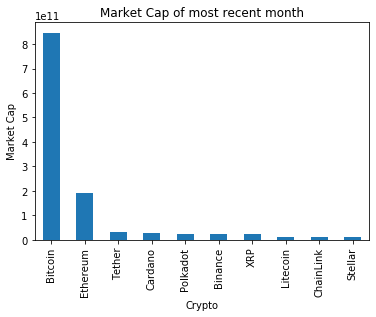

In [13]:
# The plot between the market cap and the cryptos 
#plt.plot(avg_market)
avg_market.plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Crypto')
plt.ylabel('Market Cap')
plt.title('Market Cap of most recent month')

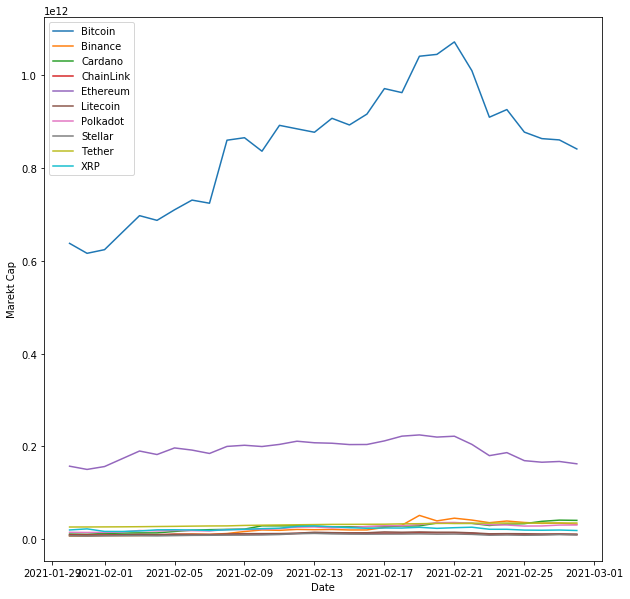

In [14]:
# A plot between market cap and dates with respect to cryptos
x= new_df['Date'].unique()
crypto = ['Bitcoin','Binance','Cardano','ChainLink','Ethereum', 'Litecoin','Polkadot','Stellar','Tether','XRP']

for i in range(len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            y.append(new_df.iloc[j,7])
    
    plt.plot(x,y,label=crypto[i])    

plt.xlabel('Date')
plt.ylabel('Marekt Cap')
plt.legend()
plt.rcParams["figure.figsize"] = (11,5)
plt.show()


Text(0.5, 1.0, 'Volume of most recent month')

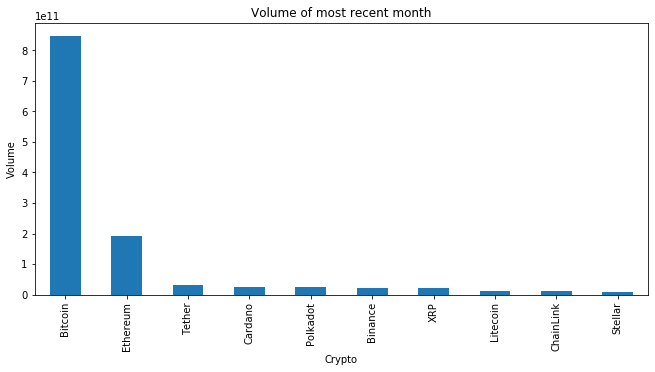

In [15]:
# The plot between avg volume and cryptos
avg_volume = crypto_group['Volume'].agg(np.mean)
avg_volume = avg_market.sort_values(ascending = False)
#plt.plot(avg_volume)
avg_volume.plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (11,10)
plt.xlabel('Crypto')
plt.ylabel('Volume')
plt.title('Volume of most recent month')

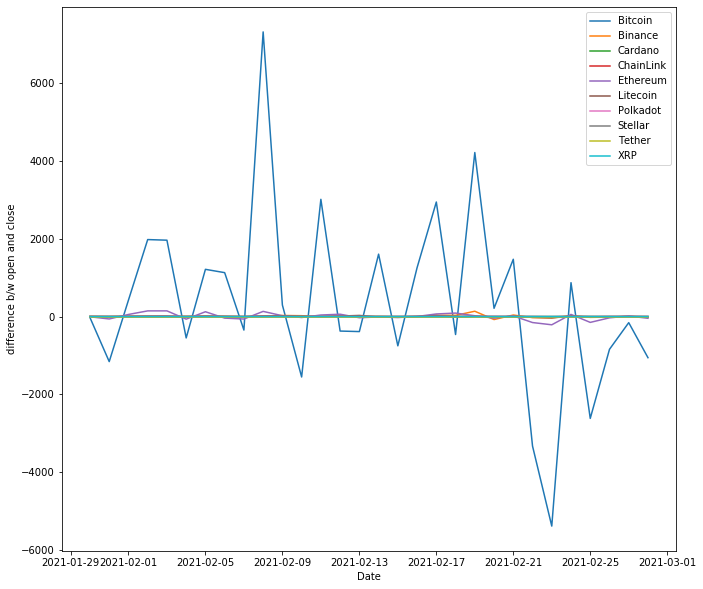

In [16]:
# The plot between the open,close difference and dates with respect to all crypto coins

for i in range(len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            d = new_df.iloc[j,5] - new_df.iloc[j,2]           
            y.append(d)
    
    plt.plot(x,y,label=crypto[i])    

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('difference b/w open and close')
plt.legend()
plt.show()    

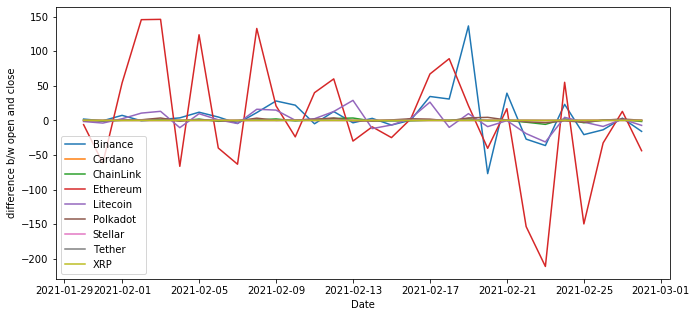

In [17]:
# The plot between open, close difference and the dates wrt to coins except bitcoin

for i in range(1,len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            d = new_df.iloc[j,5] - new_df.iloc[j,2]
            
            y.append(d)
    
    plt.plot(x,y,label=crypto[i])    

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('difference b/w open and close')
plt.legend()
plt.show()

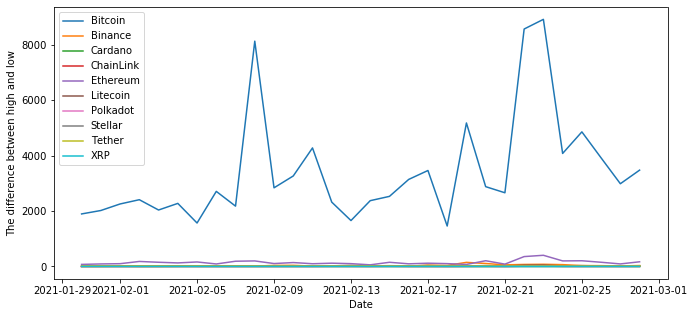

In [18]:
# the plot between the high,low difference and dates wrt crypto coins


for i in range(len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            d = new_df.iloc[j,4] - new_df.iloc[j,3]            
            y.append(d)
    
    plt.plot(x,y,label=crypto[i])    

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('The difference between high and low')
plt.legend()
plt.show()

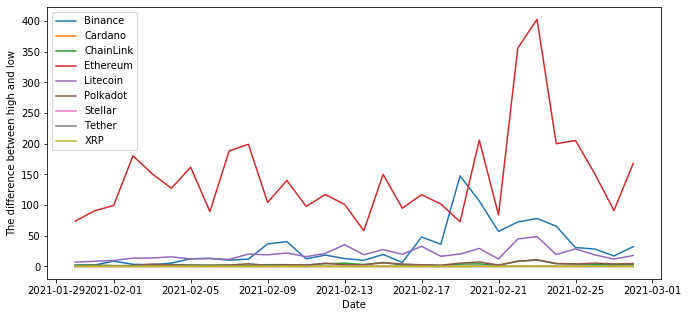

In [19]:
# the plot between the high,low difference and dates wrt crypto coins execpt bitcoin

for i in range(1,len(crypto)):
    y = []
    for j in range(len(new_df['Crypto'])):
        if new_df.iloc[j,0] == crypto[i]:
            d = new_df.iloc[j,4] - new_df.iloc[j,3]            
            y.append(d)
            
    
    plt.plot(x,y,label=crypto[i])    

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('The difference between high and low')
plt.legend()
plt.show()

In [20]:
#crypto = ['Bitcoin','Ethereum', 'Litecoin','Binance','ChainLink','Polkadot','Tether','Cardano','XRP','Stellar']
sum_marketcap = []
sum_volume = []
sum_high = []
sum_low = []
sum_close = []
sum_open = []


for i in range(len(crypto)):
    
    sum_marketcap.append(np.sum(new_df.loc[ new_df['Crypto'] == crypto[i], 'Market Cap']))
    sum_volume.append(np.sum(new_df.loc[ new_df['Crypto'] == crypto[i], 'Volume']))
    sum_high.append(np.sum(new_df.loc[ new_df['Crypto'] == crypto[i], 'High']))
    sum_low.append(np.sum(new_df.loc[ new_df['Crypto'] == crypto[i], 'Low']))
    sum_close.append(np.sum(new_df.loc[ new_df['Crypto'] == crypto[i], 'Close']))
    sum_open.append(np.sum(new_df.loc[ new_df['Crypto'] == crypto[i], 'Open']))



In [21]:
total_volume = np.sum(sum_volume) 
total_market = np.sum(sum_marketcap) 
for j in range(len(crypto)):
    sum_marketcap[j] = sum_marketcap[j]/total_market*100
    sum_volume[j] = sum_volume[j]/total_volume*100

print(sum_volume)

[27.019552629632283, 1.394284208802057, 2.8097660840760543, 2.9884519467879316, 12.048471523943846, 3.040220926437275, 1.3982853562417366, 0.8816911935224131, 44.536240354745175, 3.8830357758112415]


In [22]:
sum_marketcap = [1.934214578705552,70.61703229317298,2.154539758095596,0.9526703542563141,16.025010720384454,1.0125932349826998,
                 2.0698042896929567,0.7904251528275268,2.6010183187282854,1.842691299153635]
sum_volume = [1.3942842088020568,27.019552629632283, 2.809766084076054, 2.988451946787931, 12.048471523943844, 3.0402209264372746, 1.3982853562417363, 0.8816911935224129, 44.536240354745175, 3.8830357758112415]

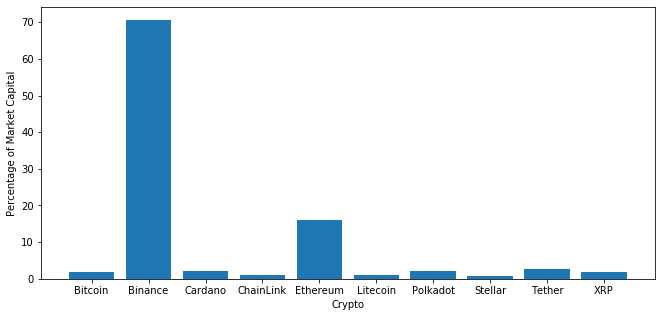

In [23]:
plt.bar(crypto,sum_marketcap)

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Crypto')
plt.ylabel('Percentage of Market Capital')
plt.show()

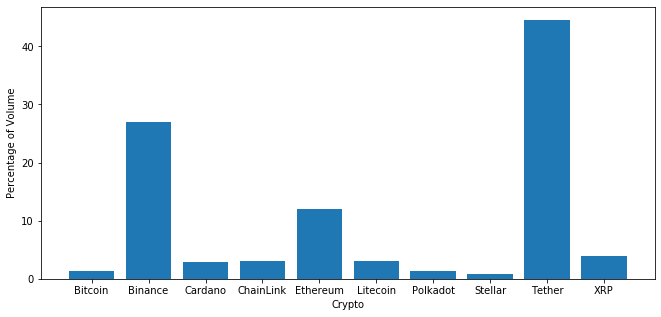

In [24]:
plt.bar(crypto,sum_volume)

plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Crypto')
plt.ylabel('Percentage of Volume')
plt.show()

In [25]:
'''
Problem statement = how the market cap changes in time depending on the independent variables
'''
open_mean = crypto_group['Open'].agg(np.mean)
close_mean = crypto_group['Close'].agg(np.mean)
volume_mean = crypto_group['Volume'].agg(np.mean)
marketcap_mean = crypto_group['Market Cap'].agg(np.mean)
high_mean = crypto_group['High'].agg(np.mean)
low_mean = crypto_group['Low'].agg(np.mean)
final_df = pd.DataFrame()

final_df['Open'] = open_mean
final_df['Close'] = close_mean
final_df['Volume'] = volume_mean
final_df['Market Cap'] = marketcap_mean
final_df['High'] = high_mean
final_df['Low'] = low_mean
final_df['Market Flow'] = sum_marketcap
final_df['Volume Flow'] = sum_volume

final_df

,Open,Close,Volume,Market Cap,High,Low,Market Flow,Volume Flow
Crypto,,,,,,,,
Binance,144.609032,150.125123,4.102506e+09,2.319925e+10,162.030957,130.381250,1.934215,1.394284
Bitcoin,45102.196626,45465.808189,7.950164e+10,8.469910e+11,46833.821814,43424.564162,70.617032,27.019553
Cardano,0.798564,0.830595,8.267384e+09,2.584187e+10,0.872683,0.744038,2.154540,2.809766
ChainLink,28.026948,28.091166,8.793145e+09,1.142647e+10,29.487187,26.129490,0.952670,2.988452
Ethereum,1675.120602,1676.191711,3.545112e+10,1.922063e+11,1737.581744,1591.619389,16.025011,12.048472
Litecoin,181.664013,182.671208,8.945469e+09,1.214519e+10,191.308122,171.104633,1.012593,3.040221
Polkadot,26.654242,27.217389,4.114279e+09,2.482554e+10,28.574595,24.912855,2.069804,1.398285
Stellar,0.419317,0.423164,2.594266e+09,9.480475e+09,0.448943,0.392387,0.790425,0.881691
Tether,1.000648,1.000701,1.310423e+11,3.119700e+10,1.001395,0.999831,2.601018,44.536240


In [26]:
final_df[1:]


,Open,Close,Volume,Market Cap,High,Low,Market Flow,Volume Flow
Crypto,,,,,,,,
Bitcoin,45102.196626,45465.808189,7.950164e+10,8.469910e+11,46833.821814,43424.564162,70.617032,27.019553
Cardano,0.798564,0.830595,8.267384e+09,2.584187e+10,0.872683,0.744038,2.154540,2.809766
ChainLink,28.026948,28.091166,8.793145e+09,1.142647e+10,29.487187,26.129490,0.952670,2.988452
Ethereum,1675.120602,1676.191711,3.545112e+10,1.922063e+11,1737.581744,1591.619389,16.025011,12.048472
Litecoin,181.664013,182.671208,8.945469e+09,1.214519e+10,191.308122,171.104633,1.012593,3.040221
Polkadot,26.654242,27.217389,4.114279e+09,2.482554e+10,28.574595,24.912855,2.069804,1.398285
Stellar,0.419317,0.423164,2.594266e+09,9.480475e+09,0.448943,0.392387,0.790425,0.881691
Tether,1.000648,1.000701,1.310423e+11,3.119700e+10,1.001395,0.999831,2.601018,44.536240
XRP,0.482072,0.486774,1.142535e+10,2.210151e+10,0.527344,0.446824,1.842691,3.883036


In [27]:
corr_matrix = final_df.corr()
corr_matrix

,Open,Close,Volume,Market Cap,High,Low,Market Flow,Volume Flow
Open,1.000000,1.000000,0.413190,0.984725,1.000000,1.000000,0.984725,0.413190
Close,1.000000,1.000000,0.413152,0.984676,1.000000,1.000000,0.984676,0.413152
Volume,0.413190,0.413152,1.000000,0.435713,0.413133,0.413200,0.435713,1.000000
Market Cap,0.984725,0.984676,0.435713,1.000000,0.984711,0.984648,1.000000,0.435713
High,1.000000,1.000000,0.413133,0.984711,1.000000,1.000000,0.984711,0.413133
Low,1.000000,1.000000,0.413200,0.984648,1.000000,1.000000,0.984648,0.413200
Market Flow,0.984725,0.984676,0.435713,1.000000,0.984711,0.984648,1.000000,0.435713
Volume Flow,0.413190,0.413152,1.000000,0.435713,0.413133,0.413200,0.435713,1.000000


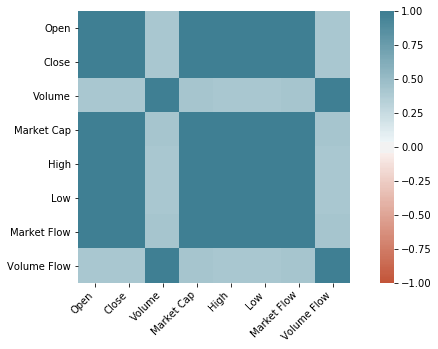

In [28]:
heat_corr = sns.heatmap(
                        corr_matrix,
                        vmin = -1,
                        vmax = 1,
                        center = 0,
                        cmap = sns.diverging_palette(20,220,n=200),
                        square = True)

heat_corr.set_xticklabels(heat_corr.get_xticklabels(),
                         rotation = 45,
                         horizontalalignment = 'right'
                         );

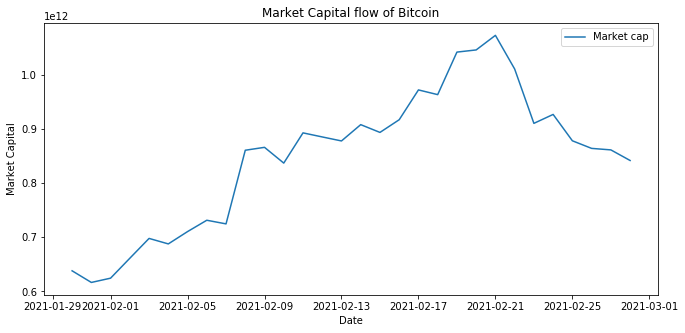

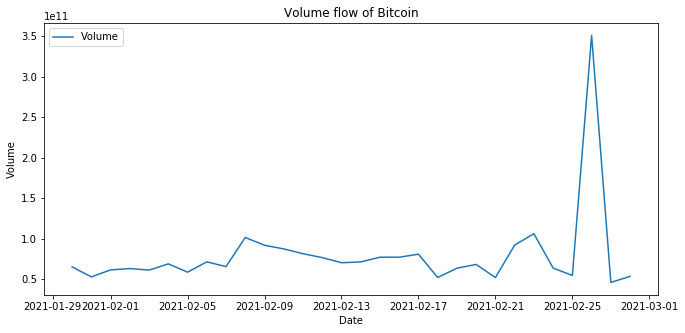

In [34]:
x= new_df['Date'].unique()

y1 = []
y2 = []
for j in range(len(new_df['Crypto'])):
    if new_df.iloc[j,0] == 'Bitcoin':
        y1.append(new_df.iloc[j,7])
        y2.append(new_df.iloc[j,6])
        
plt.plot(x,y1,label='Market cap')


plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('Market Capital')
plt.title('Market Capital flow of Bitcoin')
plt.legend()
plt.show()

plt.plot(x,y2,label = 'Volume')
plt.rcParams["figure.figsize"] = (11,5)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume flow of Bitcoin')
plt.legend()
plt.show()

## STEP-2##

,Open,Close,Volume,Market Cap,High,Low,Market Flow,Volume Flow
Crypto,,,,,,,,
Binance,144.609032,150.125123,4.102506e+09,2.319925e+10,162.030957,130.381250,1.934215,1.394284
Cardano,0.798564,0.830595,8.267384e+09,2.584187e+10,0.872683,0.744038,2.154540,2.809766
ChainLink,28.026948,28.091166,8.793145e+09,1.142647e+10,29.487187,26.129490,0.952670,2.988452
Ethereum,1675.120602,1676.191711,3.545112e+10,1.922063e+11,1737.581744,1591.619389,16.025011,12.048472
Litecoin,181.664013,182.671208,8.945469e+09,1.214519e+10,191.308122,171.104633,1.012593,3.040221
Polkadot,26.654242,27.217389,4.114279e+09,2.482554e+10,28.574595,24.912855,2.069804,1.398285
Stellar,0.419317,0.423164,2.594266e+09,9.480475e+09,0.448943,0.392387,0.790425,0.881691
Tether,1.000648,1.000701,1.310423e+11,3.119700e+10,1.001395,0.999831,2.601018,44.536240
XRP,0.482072,0.486774,1.142535e+10,2.210151e+10,0.527344,0.446824,1.842691,3.883036


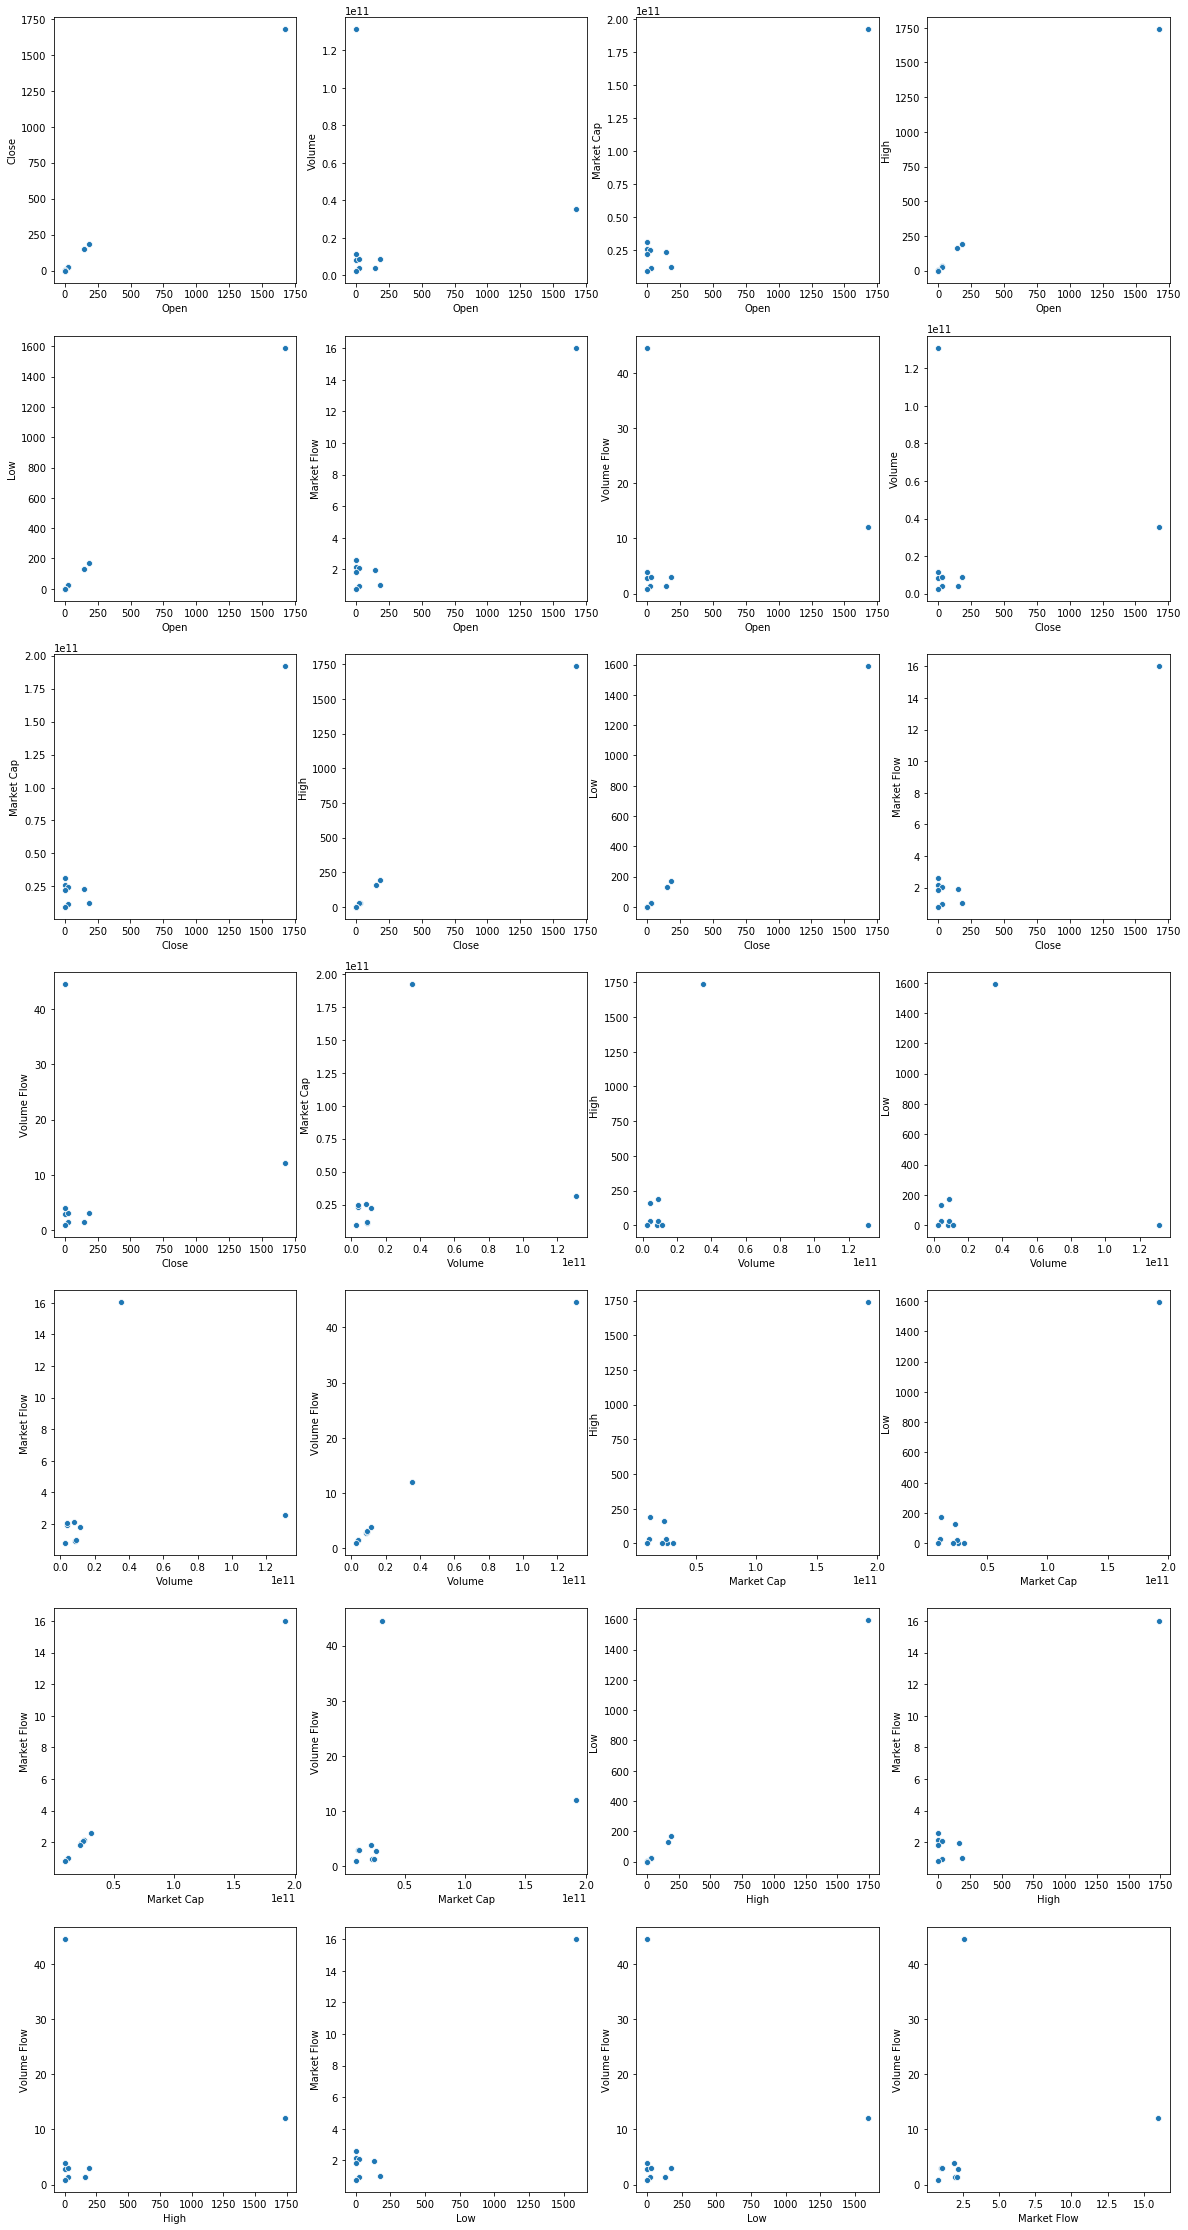

In [43]:
'''
Predict market cap wrt all other variables.
'''
data1 = final_df[0:1]
data2 = final_df[2:]
data = pd.concat([data1, data2])

crypto = ['Open', 'Close' , 'Volume', 'Market Cap', 'High','Low', 'Market Flow', 'Volume Flow']
## Linear regression
plt.figure(figsize = (20,40))
plt.subplots_adjust(hspace = 0.2)
m = 7
n = 4
k = 1

for i in range(len(crypto)):
    for j in range(i+1,len(crypto)):
        ax = plt.subplot(m,n,k)
        sns.scatterplot(x = crypto[i], y = crypto[j], data = data , ax = ax )
        k += 1 
